# Introduction

Important Info:

Hi and welcome to the Sportlogiq DA Questionnaire! The goal with this questionnaire is to assess your problem solving, hockey knowledge, attention to detail, coding/stats abilities and your (hopeful) fit with some of our day-to-day tasks. If you find yourself stuck or unsure on a question, showing your work and explaining your problem solving/decision making is still highly recommended.

Libraries:
- You'll want to import libraries such as numpy, pandas, a plotting library like plotly/matplotlib, and a stats library of your choosing (sklearn for example)

Data Info:
- There are two data files & a rink template for scatter plots. One data file has a condensed event set from a randomly chosen hockey game and the other contains Expected Goals values (xG) to be merged onto shot attempts for this game. **If an xG value does not correspond to a shot event, it should not be counted**

- X and Y Coordinates are in feet and are adjusted such that both teams attack from left (dz) to right (oz)
    - X values range from -100 (end boards behind the DZ net) to 0 (centre ice) and 100 (end boards behind the OZ net)
    - Y values range from -42.5 (west side boards) to 0 (centre ice) and 42.5 (east side boards)
    - **When creating scatter plots, please use these coordinates along with the provided rink_template to display the full rink**

- Binary columns that have values of 0 or 1 indicate 0=No, 1=Yes

- Successfull passes are completed passes, successful shots are shots on net

- Compiledgametime is in seconds, periods are 20 minutes long, except for overtime which is 5 minutes or less

Please show all work, **keep written answers succinct and to the point** and most of all, thanks for your time and good luck!

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.dpi'] = 100

gameEventCols = ['eventname', 'outcome', 'type', 'compiledgametime', 'playsection', 'zone', 'manpowersituation', 'goal', 'teamid', 'playerid', 'opposingteamgoalieoniceid', 'xadjcoord', 'yadjcoord']
xgCols = ['compiledgametime', 'playerid', 'xg']

gameEvent = pd.read_csv('DA_Tutorial_24.csv', encoding='unicode_escape', usecols=gameEventCols)
xg = pd.read_csv('DA_Tutorial_24_xg.csv', encoding='unicode_escape', usecols=xgCols)

game_eventName = gameEvent['eventname'].to_numpy()
game_outcome = gameEvent['outcome'].to_numpy()
game_type = gameEvent['type'].to_numpy()
game_compiledTime = gameEvent['compiledgametime'].to_numpy()
game_playSection = gameEvent['playsection'].to_numpy()
game_zone = gameEvent['zone'].to_numpy()
game_manpower = gameEvent['manpowersituation'].to_numpy()
game_goal = gameEvent['goal'].to_numpy()
game_teamID = gameEvent['teamid'].to_numpy()
game_playerID = gameEvent['playerid'].to_numpy()
game_opposingGoalieID = gameEvent['opposingteamgoalieoniceid'].to_numpy()
game_xAdj = gameEvent['xadjcoord'].to_numpy()
game_yAdj = gameEvent['yadjcoord'].to_numpy()

xg_compiledTime = xg['compiledgametime'].to_numpy()
xg_playerID = xg['playerid'].to_numpy()
xg_expectedGoals = xg['xg'].to_numpy()


## Q1) 
### a) Which teamid won the game, what was the score, which period was the winning goal scored in?
### b) Limited to the period where the winning goal was scored, create a scatter plot for the winning team's shot attempts in that period and highlight the winning goal in a different colour.

In [47]:
# Q1 Part a)
team1_goals = np.where((game_teamID == 311) & (game_goal == 1), 1, 0)
team2_goals = np.where((game_teamID == 315) & (game_goal == 1), 1, 0)

print('Team 311 goals:', np.sum(team1_goals))
print('Team 315 goals:', np.sum(team2_goals))


def determinePeriod(time):
    if (time >= 0) & (time < 1200):
        return 1
    elif (time >= 1200) & (time < 2400):
        return 2
    elif (time >= 2400) & (time < 3600):
        return 3
    else:
        return 4
    
def getGoalsIndex(goals):
    return np.where(goals == 1)[0]

# If team 311 won the game 
if np.sum(team1_goals) > np.sum(team2_goals):
    
    team1_goalsIndex = getGoalsIndex(team1_goals)
    team1_goalTimes = np.take(game_compiledTime, team1_goalsIndex)
    
    team1_lastGoalTime = team1_goalTimes[-1]
    
    print('Winning goal was in period', determinePeriod(team1_lastGoalTime), 'by team 311')
    
# If team 315 won the game
else:
    team2_goalsIndex = getGoalsIndex(team2_goals)
    team2_goalTimes = np.take(game_compiledTime, team2_goalsIndex, axis=None)
    
    team2_lastGoalTime = team2_goalTimes[-1]

    print('Winning goal was in period', determinePeriod(team2_lastGoalTime), 'by team 315')


Team 311 goals: 3
Team 315 goals: 4
Winning goal was in period 4 by team 315


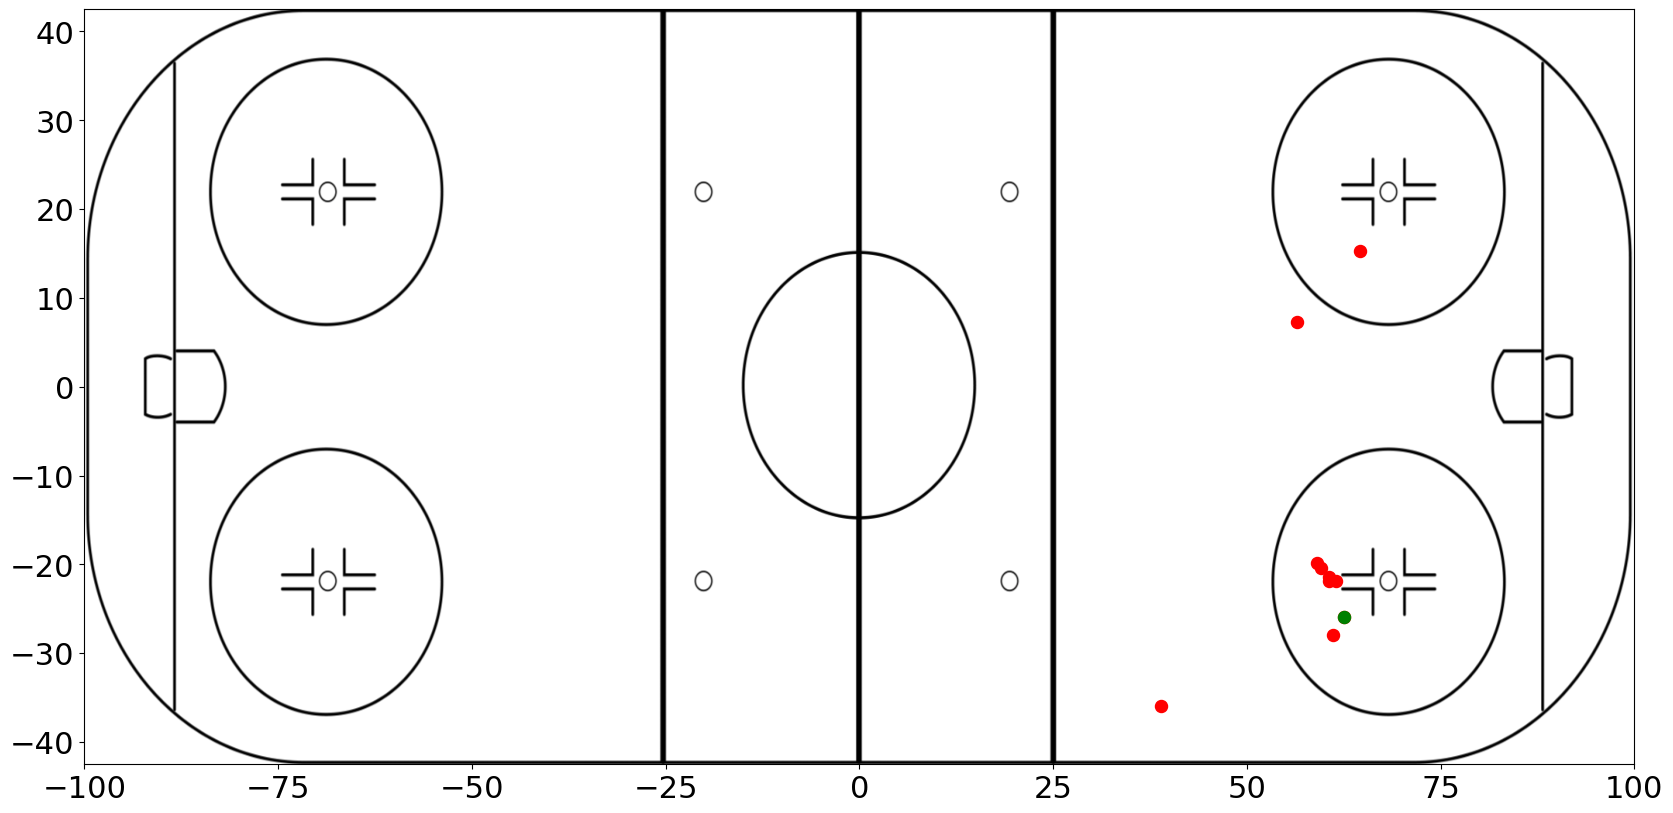

In [48]:
# Q1 Part b)
plt.figure(figsize=(20, 10))

rink = plt.imread('rink_template.png')
rinkPlot = plt.imshow(rink, aspect='auto', extent=[-100, 100, -42.5, 42.5])

# Team 315 shots in overtime where overtime is over 3600 game seconds
team2_shots = np.where((game_teamID == 315) & (game_eventName == 'shot') & (game_compiledTime > 3600))[0]

shots_x_coords = np.take(game_xAdj, team2_shots)
shots_y_coords = np.take(game_yAdj, team2_shots)

plt.scatter(shots_x_coords, shots_y_coords, c='r', s=75)

# Winning Goal index
team2_goals = np.where((game_teamID == 315) & (game_goal == 1))[0]

shots_gameWinner_x_coords = np.take(game_xAdj, team2_goals)
shots_gameWinner_y_coords = np.take(game_yAdj, team2_goals)

# Last goal was the winning goal
plt.scatter(shots_gameWinner_x_coords[-1], shots_gameWinner_y_coords[-1], c='g', s=75)

plt.show()

## A1)
### a) Team 315 won the game. The score was 4-3 for Team 315. The winning goal was in overtime (Period 4).
### b) Refer to code section above ![image info](Shots%20Attempted%20in%20Overtime.png)


## Q2)

### a) Which playerid scored the winning goal? 
### b) Create a scatter plot for all of this player's powerplay shot attempts for the full game.
### c) If we told you these were Alex Ovechkin's powerplay shot attempts, what would you need to do to the Y coordinates for these attempts to appear from "Ovi's Office"? Please re-create the scatter plot accordingly.

In [49]:
# Q2 Part a)
game_scoredWinningGoal = np.where((game_teamID == 315) & (game_goal == 1) & (game_compiledTime > 3600))[0]

player_scoredWinningGoal = np.take(game_playerID, game_scoredWinningGoal)[0]

print('Player with the ID', player_scoredWinningGoal, 'scored the winning goal for team 315')

Player with the ID 81408 scored the winning goal for team 315


Player with ID 81408 had 15 power play shot attempts.


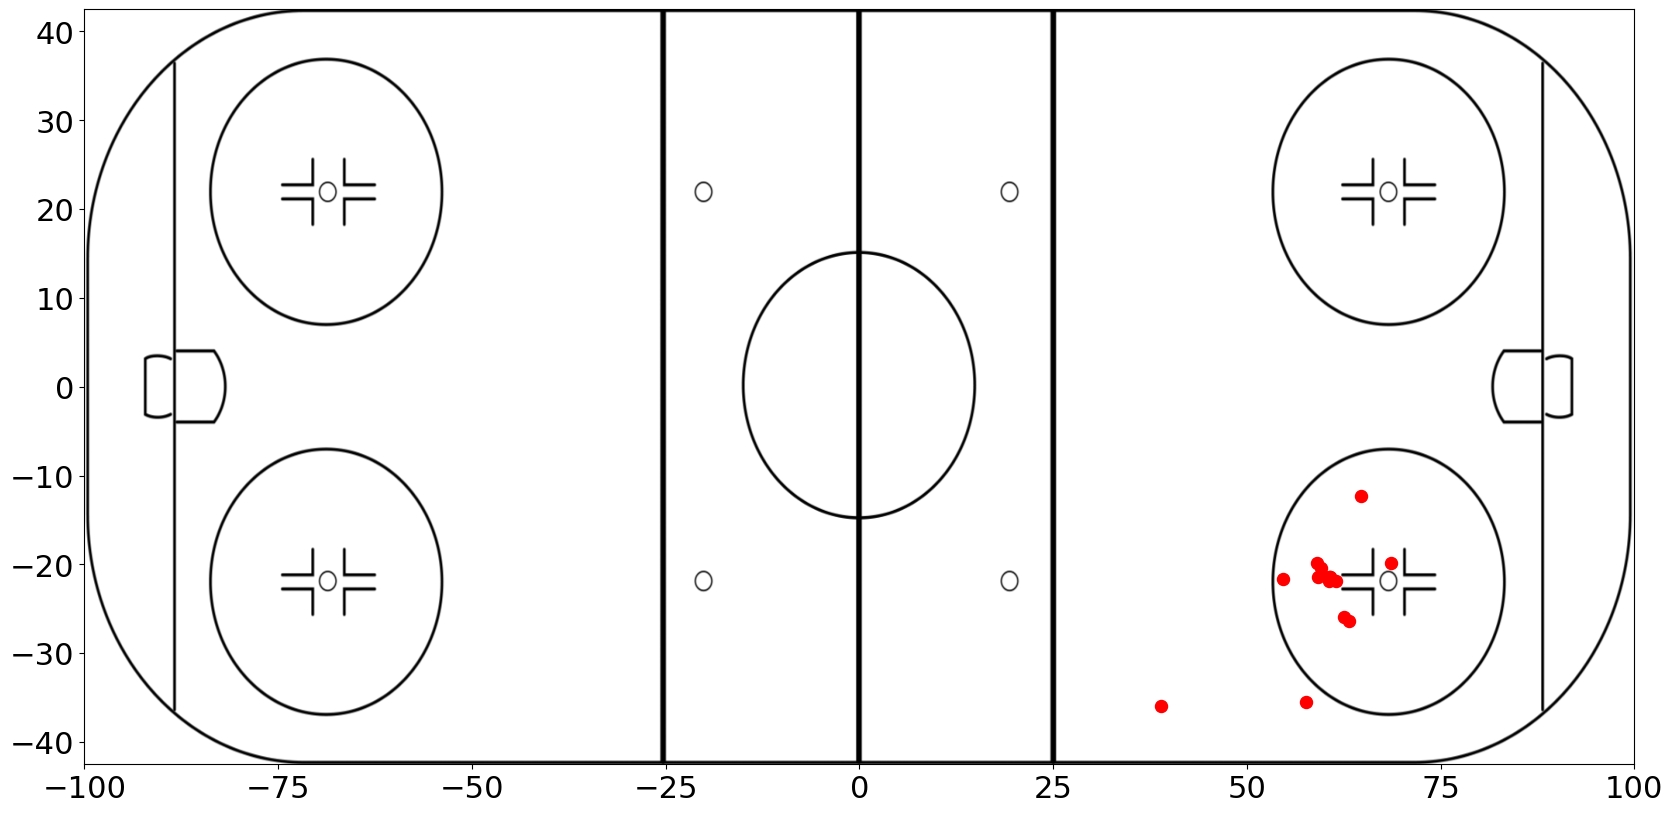

In [50]:
# Q2 Part b) 
plt.figure(figsize=(20, 10))

rinkPlot = plt.imshow(rink, aspect='auto', extent=[-100, 100, -42.5, 42.5])

player_shots = np.where((game_playerID == player_scoredWinningGoal) & (game_eventName == 'shot') & (game_manpower == 'powerPlay'))[0]

print('Player with ID', player_scoredWinningGoal ,'had', len(player_shots), 'power play shot attempts.')

player_shots_x_coords = np.take(game_xAdj, player_shots)
player_shots_y_coords = np.take(game_yAdj, player_shots)

plt.scatter(player_shots_x_coords, player_shots_y_coords, c='r', s=75)

plt.show()

In [ ]:
# Q2 part c)




## A2)
### a)
### b)
### c)

## Q3)
### a) The Assistant Coach wants to know how each team's even strength pass completion rate breaks down in each zone (please use the zone of pass origin). Build a simple visual to display this information for them in a clear and digestible way. 
### b) Which zone was more difficult to complete passes in at even strength, why do you think that is? 
### c) What was each goalie id's slot save percentage? (the slot includes innerSlot, westOuterSlot, & eastOuterSlot)

## A3) 
### a)
### b)
### c)

## Q4)
### a) Assuming the centre of the net is at X=89 (goal line), Y=0 (centre ice), what was the average shot distance for each team for shots from the outside north west playsection to the centre of the net?
### b) What was each goalie's Goals Saved Above Expected from the outside north west playsection? What does this tell us about their performance from this area?

## A4)
### a)

### b)

## Q5)
### a) If a "Shot Assist" is defined as a sequence of events where there is: 1) a successful pass followed by 2) a successful reception by a *teammate* and then without giving up the puck 3) the receiving player has a shot attempt, create a column flagging shots that have a Shot Assist. How many shot attempts did playerid 7380 have that were assisted?
### b) For shots that were assisted, if the full xG value from the shot attempt was credited to the passer for their successful pass (shot assist), which passer created the most xG for their teammates?
### c) Plot a single diagram of this passer's shot assists (pass to reception) and their corresponding shots (reception to shot). Hint: Don't forget what you learned about plotting Y coordinates.

## A5)
### a)
### b)
### c)

## Q6)
### a) Which team won the xG battle and how much xG did each teamid have?
### b) Given who won the game, what does this tell you about how the game went?

## A6)
### a)
### b)

## Q7) 
### a) With the information provided in the data files and the columns you've been asked to create in the questions above, use a statistical technique of your choice to show the highest predictors of a goal within this dataset (what would use if you were building an xG model).
### b) Please explain your reasoning for your choices in answering 7a) and then explain your findings like you were talking to the Assistant Coach.

### Hint: look back at the columns you were asked to create, along with the information already provided in the event dataset, what would lead to dangerous shot attempts? Are there other features from a pass-reception-shot sequence (for example) that would be easy to create with the information provided?

## A7)
### a)
### b)

# Before you submit:

Please check that you have answered all questions (and sub-questions) to the best of your ability and that every answer can be clearly traced back to work that is shown. If you were unable to produce an answer, please describe and show the work you tried.

Thanks for your time, effort and interest and we hope you enjoyed this exercise!